In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neurolib.models.multimodel import MultiModel

from hippocampus import HippocampalCA3Node

plt.style.use("default_light")

In [2]:
DT = 0.05
SAMPLING_DT = 0.1


def simulate_hc(duration=8, backend="numba"):
    hc = HippocampalCA3Node(constant_depression=True, syn_facilitation=True)
    m = MultiModel.init_node(hc)
    m.model_instance.initial_state = np.array([0.0001, 0.003, 0.012, 0.0])
    m.params["HCnode_0.aSWR-HC-NoDP_2.e"] = 0.5
    m.params["backend"] = backend
    m.params["duration"] = duration * 1e3
    m.params["dt"] = DT
    m.params["sampling_dt"] = SAMPLING_DT
    m.run()
    return m.xr()

In [17]:
res = simulate_hc(duration=8, backend="numba")

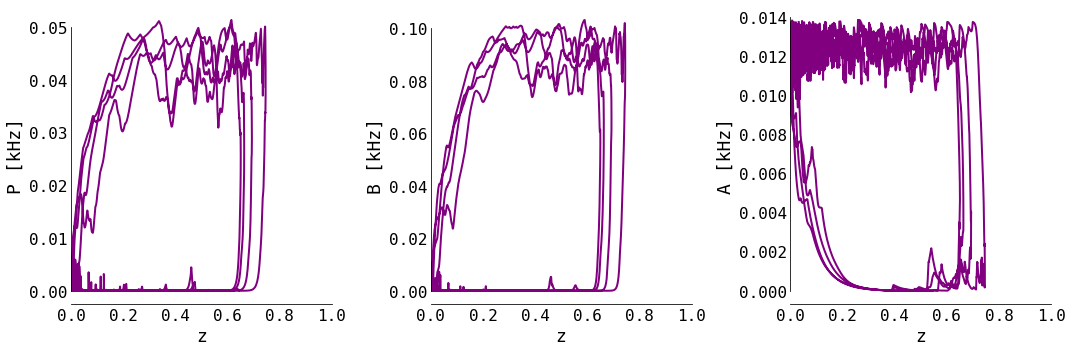

In [18]:
_, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 5))

axs[0].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_EXC"}).T,
    color="purple",
)
axs[1].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_INH"}).T,
    color="purple",
)
axs[2].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_aSWR"}).T,
    color="purple",
)

axs[0].set_ylabel("P [kHz]")
axs[1].set_ylabel("B [kHz]")
axs[2].set_ylabel("A [kHz]")

for ax in axs:
    ax.set_xlabel("z")
    ax.set_xlim([0, 1.0])
    sns.despine(ax=ax, trim=True)

plt.tight_layout()

plt.savefig("../figs/p_a_facilitation.pdf", transparent=True, bbox_inches="tight")